In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


import necessary libraries

In [ ]:
import pandas as pd
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import numpy as np
import itertools 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


loading data

In [ ]:
sms = pd.read_csv('/content/drive/MyDrive/datascience_file/SMSSpamCollection', sep='\t',names=["label", "sms"])

In [ ]:
sms.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Text Preprocesing

In [ ]:
st = PorterStemmer()
word = []
for i in range(0, len(sms)):
    rev= re.sub('[^a-zA-Z]', ' ', sms['sms'][i])
    rev = rev.lower()
    rev = rev.split()
    
    rev = [st.stem(word) for word in rev if not word in stopwords.words('english')]
    rev = ' '.join(rev)
    word.append(rev)

Creating word vectors or document matrix

In [ ]:
# Creating vectors using TF-IDF
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(word).toarray()

y=pd.get_dummies(sms['label'])
y=y.iloc[:,1].values

Splitting the data

In [ ]:
# train test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

model training

In [ ]:
# Training model using Naive bayes classifier
model = MultinomialNB().fit(X_train, y_train)

make prediction

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

check performance

[[955   0]
 [ 23 137]]
Confusion matrix, without normalization


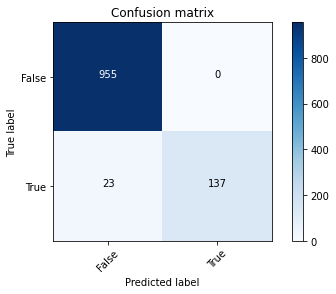

In [ ]:
print(confusion_matrix(y_test,y_pred))
plot_confusion_matrix(confusion_matrix(y_test,y_pred),classes=['False', 'True'])

In [ ]:
print(accuracy_score(y_test,y_pred))

0.979372197309417
